In [5]:
# Definições Gerais
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Leitura dos arquivos da base de dados e da base de dados complementar para atribuir os continentes.
data = pd.read_csv('../cause_of_deaths.csv')
data_continent = pd.read_csv('../gapminder.tsv', sep='\t')

# Warnings ignoradas
warnings.filterwarnings('ignore')


In [4]:
# Criação de uma nova coluna 'Continent' por meio do dataset obtido em 'gapminder.tsv'
paises = list(data_continent['country'])
continentes = list(data_continent['continent'])
associacao = dict(zip(paises,continentes))

for i in data.index:
    if data.loc[i, 'Country/Territory'] in associacao:
        data.loc[i, 'Continent'] = associacao[data.loc[i, 'Country/Territory']]


In [5]:
# Obtendo os dados em relação aos continentes
somatorio_doencas_continente = data.groupby('Continent').sum()
maiores_causas_continentes = somatorio_doencas_continente.idxmax(axis=1)
print(maiores_causas_continentes)

Continent
Africa      Cardiovascular Diseases
Americas    Cardiovascular Diseases
Asia        Cardiovascular Diseases
Europe      Cardiovascular Diseases
Oceania     Cardiovascular Diseases
dtype: object


In [6]:
# Obtendo os dados em relação aos países
somatorio_doencas_paises = data.groupby(['Country/Territory']).sum().drop('Year', axis=1)
maiores_causas_paises = somatorio_doencas_paises.idxmax(axis=1)
print(maiores_causas_paises.head(30))

Country/Territory
Afghanistan               Cardiovascular Diseases
Albania                   Cardiovascular Diseases
Algeria                   Cardiovascular Diseases
American Samoa            Cardiovascular Diseases
Andorra                                 Neoplasms
Angola                         Diarrheal Diseases
Antigua and Barbuda       Cardiovascular Diseases
Argentina                 Cardiovascular Diseases
Armenia                   Cardiovascular Diseases
Australia                 Cardiovascular Diseases
Austria                   Cardiovascular Diseases
Azerbaijan                Cardiovascular Diseases
Bahamas                   Cardiovascular Diseases
Bahrain                   Cardiovascular Diseases
Bangladesh                Cardiovascular Diseases
Barbados                  Cardiovascular Diseases
Belarus                   Cardiovascular Diseases
Belgium                   Cardiovascular Diseases
Belize                    Cardiovascular Diseases
Benin                          N

In [7]:
# Selecionando os dados referentes ao Brasil
mask_brasil = data['Country/Territory'] == 'Brazil'
dados_brasil = data.loc[mask_brasil, :] #Dados Completos do Brasil
dados_brasil_reduzido = data.iloc[750:780, 3:-1] #Dados reduzidos, pegando apenas as doenças

somatorio_doencas_brasil = dados_brasil_reduzido.sum() # Quantidade total de mortes no Brasil por causa durante os anos 1990 até 2019

eixo_x = somatorio_doencas_brasil.sort_values(ascending=False)[:10].index
eixo_y = somatorio_doencas_brasil.sort_values(ascending=False)[:10].values

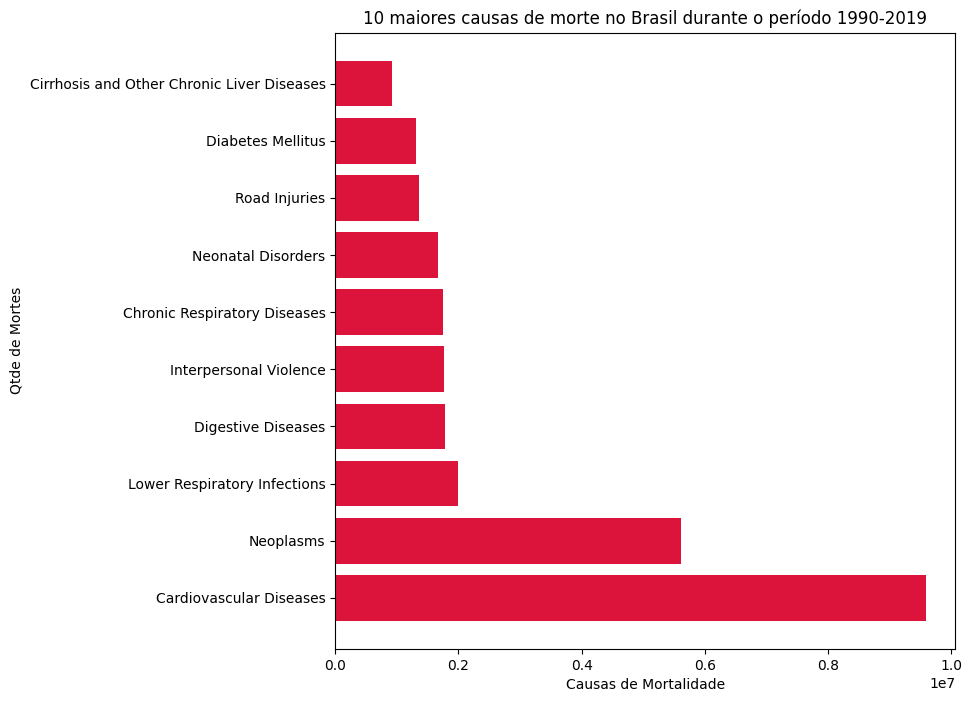

In [8]:
plt.figure(figsize=(8,8))
plt.barh(eixo_x, eixo_y, color='crimson')
plt.xlabel('Causas de Mortalidade')
plt.ylabel('Qtde de Mortes')
plt.title('10 maiores causas de morte no Brasil durante o período 1990-2019')
plt.show()